# Svalbard Global Seed Vault
Here's the [website](http://www.nordgen.org/index.php/en/content/view/full/1400)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# seed deposit events data
# file is actually tab-delimited, not xls, so open with read_table() instead of read_excel()

# This pulls the data from the Seed Vault website
deposits = pd.read_table('http://www.nordgen.org/sgsv/download.php?file=/scope/sgsv/files/sgsv_by_deposit_date.xls', header=0)

# You can use this instead if you're running this notebook from a Binder link
#deposits = pd.read_table('./data/seeds.xls', header=0)

In [2]:
deposits.head(3)

,sgsv_by_deposit_date_id,institute_code,deposit_date,depositor_name,institute_acronym,accessions,seeds,seed_boxes,taxa,species,genus,countries,continents
0,679192,ARM035,2012-03-01,"Armenian State Agrarian University, Laboratory...",LPGPB,175,87500.0,1,22,21,4,1,1
1,679193,AUS006,2014-02-25,"Australian Medicago Genetic Resources Centre, ...",SARDI,2926,1085800.0,3,57,43,1,65,6
2,679194,AUS165,2011-02-16,Australian Grains Genebank,AGG,343,35438.0,1,2,2,2,6,1


## Top 10 Seed Depositors

In [3]:
# create new dataset with depositors' totals
totals = deposits.groupby("depositor_name", as_index=False).sum()

In [4]:
# the top 10 depositors with the most seeds
most = totals.sort_values(by="seeds", ascending=False).head(10)
most

,depositor_name,sgsv_by_deposit_date_id,accessions,seeds,seed_boxes,taxa,species,genus,countries,continents
30,International Crop Research Institute for the ...,6113277,110818,229616519.0,300,74,74,68,845,53
33,International Rice Research Institute,2717242,122060,61562149.0,182,111,95,13,351,24
29,International Centre for Agricultural Research...,4755345,116484,58380430.0,325,1145,825,106,608,40
45,National Plant Germplasm System,4755604,108022,39230572.0,303,3067,2703,890,976,42
14,Centro Internacional de Mejoramiento de Maíz y...,3396375,130291,39095877.0,405,34,26,19,235,23
13,Centro Internacional de Agricultura Tropical,6792205,54664,22305850.0,161,2158,2150,528,803,60
34,Leibniz Institute of Plant Genetics and Crop P...,4754645,48653,20852449.0,78,7300,4349,1695,692,42
52,Plant Gene Resources of Canada,2716842,25868,18344293.0,167,476,428,199,310,24
49,Nordic Genetic Resource Center,5434620,21123,10299952.0,46,863,729,445,218,46
39,National Agricultural Research Organization,1358705,777,8994623.0,3,14,14,5,4,4


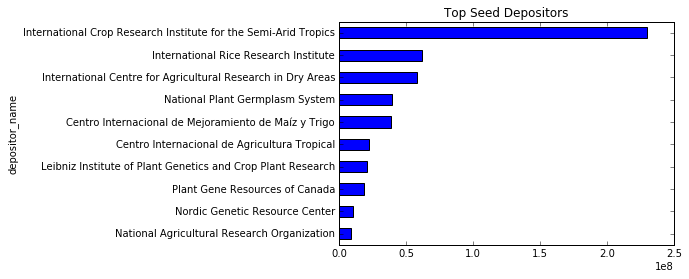

In [5]:
most.sort_values(by="seeds", ascending=True).plot(x="depositor_name", y="seeds", kind="barh", title="Top Seed Depositors", legend=False);